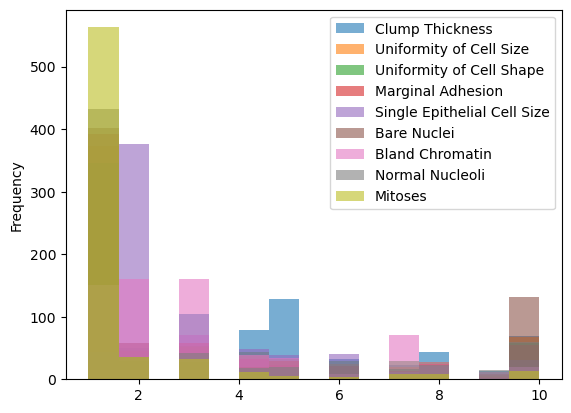

Corrolation between Clump Thickness and Cancer type  : 0.715
Corrolation between Uniformity of Cell Size and Cancer type  : 0.821
Corrolation between Uniformity of Cell Shape and Cancer type  : 0.822
Corrolation between Marginal Adhesion and Cancer type  : 0.706
Corrolation between Single Epithelial Cell Size and Cancer type  : 0.691
Corrolation between Bare Nuclei and Cancer type  : 0.823
Corrolation between Bland Chromatin and Cancer type  : 0.758
Corrolation between Normal Nucleoli and Cancer type  : 0.719
Corrolation between Mitoses and Cancer type  : 0.423

Measured accuracies:[0.98540146 0.94890511 0.96350365 0.94852941 0.97794118]
Mean accuracy on k fold by k=5 validation set:96.486
Best accuracy on k fold by k=5 validation set:98.540
[[44  0]
 [ 2 22]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.92      0.96        24

    accuracy                           0.97        68
   macro av

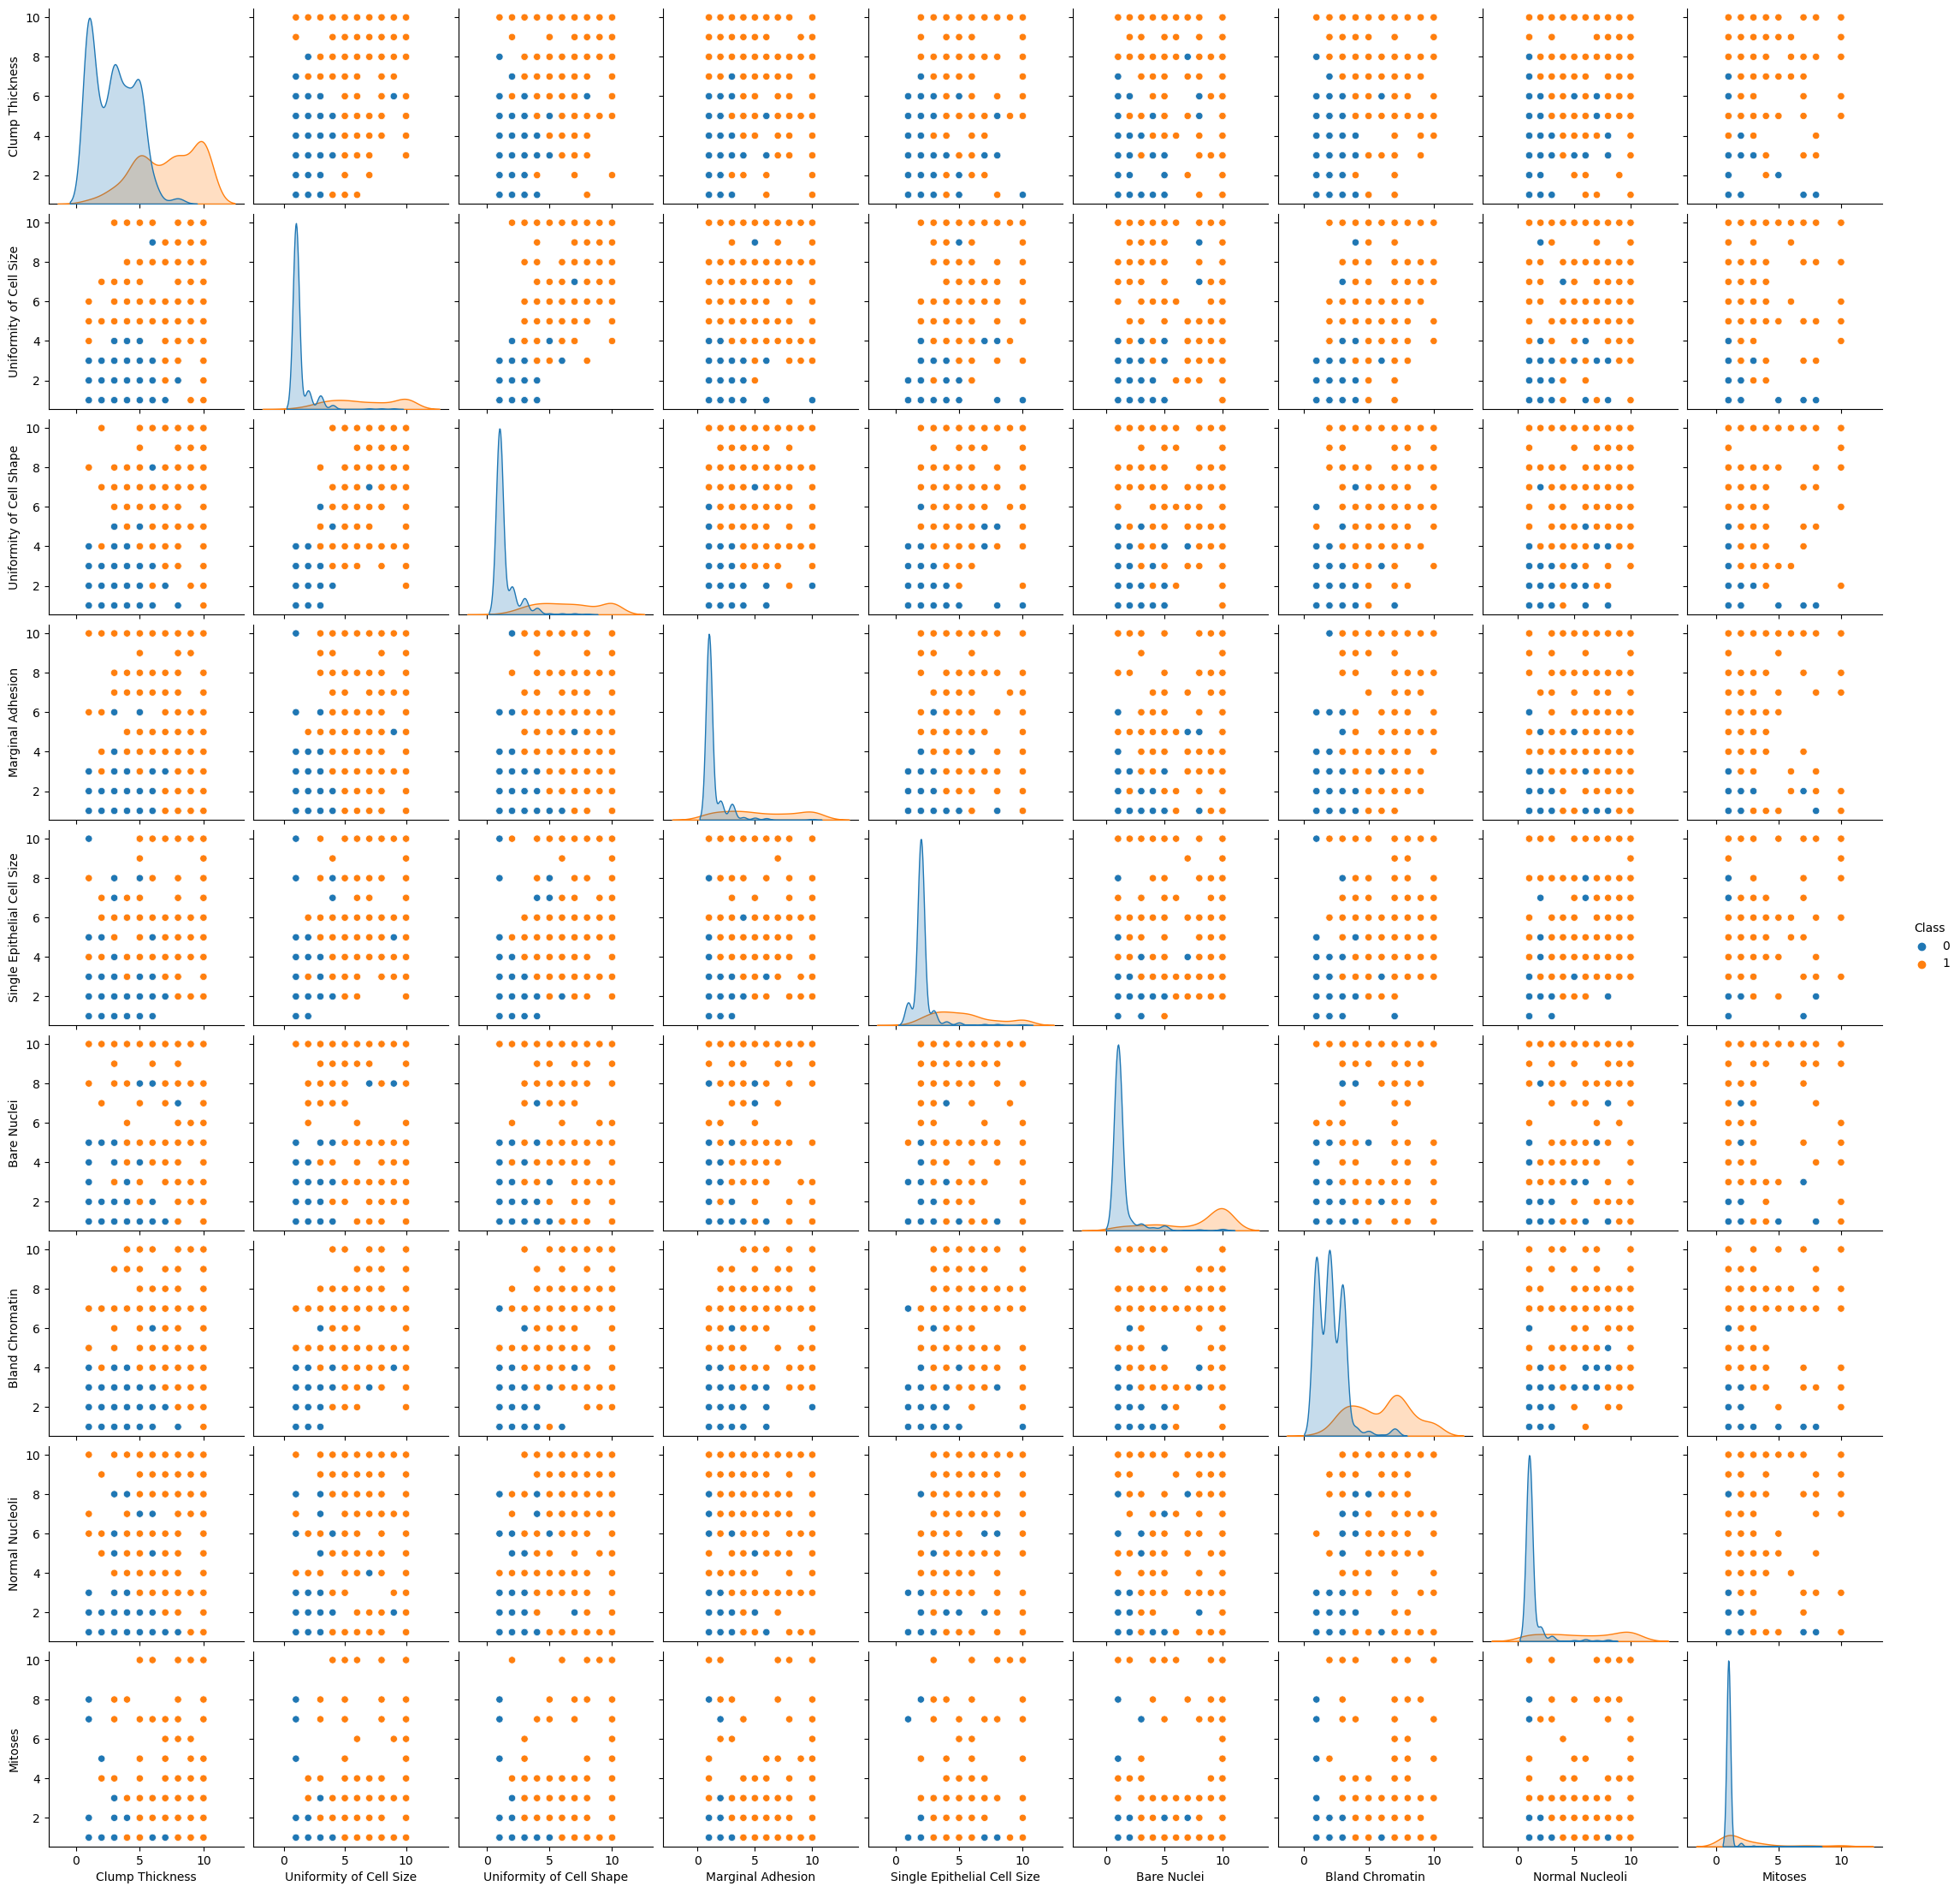

In [22]:
#AI_Project2_Question1
#Mohammad_EbrahimZadeh_810601023
#Start
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
dataset = pd.read_csv(r'C:\Users\Nima\Desktop\AI Project 2/breast_cancer.csv')
dataset.describe()
dataset['Class']= dataset['Class'].replace(2,0)
dataset['Class']= dataset['Class'].replace(4,1)
data_distribution1=dataset.drop('Class',axis=1).copy()
data_distribution1.plot(kind='hist',bins=15,alpha=.6)
plt.show()
def color_row(row):
    if row['Class'] == 0:
        return ['background-color: green'] * len(row)
    elif row['Class'] == 1:
        return ['background-color: red'] * len(row)
    else:
        return [''] * len(row)
table = dataset.style.apply(color_row, axis=1)
table
sns.pairplot(dataset, hue='Class')
corr1 = dataset['Clump Thickness'].corr(dataset['Class'])
corr2 = dataset['Uniformity of Cell Size'].corr(dataset['Class'])
corr3 = dataset['Uniformity of Cell Shape'].corr(dataset['Class'])
corr4 = dataset['Marginal Adhesion'].corr(dataset['Class'])
corr5 = dataset['Single Epithelial Cell Size'].corr(dataset['Class'])
corr6 = dataset['Bare Nuclei'].corr(dataset['Class'])
corr7 = dataset['Bland Chromatin'].corr(dataset['Class'])
corr8 = dataset['Normal Nucleoli'].corr(dataset['Class'])
corr9 = dataset['Mitoses'].corr(dataset['Class'])
print("Corrolation between Clump Thickness and Cancer type  : {:.3f}".format(corr1))
print("Corrolation between Uniformity of Cell Size and Cancer type  : {:.3f}".format(corr2))
print("Corrolation between Uniformity of Cell Shape and Cancer type  : {:.3f}".format(corr3))
print("Corrolation between Marginal Adhesion and Cancer type  : {:.3f}".format(corr4))
print("Corrolation between Single Epithelial Cell Size and Cancer type  : {:.3f}".format(corr5))
print("Corrolation between Bare Nuclei and Cancer type  : {:.3f}".format(corr6))
print("Corrolation between Bland Chromatin and Cancer type  : {:.3f}".format(corr7))
print("Corrolation between Normal Nucleoli and Cancer type  : {:.3f}".format(corr8))
print("Corrolation between Mitoses and Cancer type  : {:.3f}".format(corr9))
print()
y=dataset['Class']
x=dataset.drop(['Class'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2,random_state=1)
x_test, x_val, y_test, y_val =train_test_split(x_test,y_test, test_size= 0.5,random_state=1)
reg=LogisticRegression()
reg.fit(x_train,y_train)
y_predict = reg.predict(x_test)
k=5
kf=KFold(n_splits=k,shuffle=True,random_state=1)
results=cross_val_score(reg,x,y,cv=kf)
scoring='accuracy'
mean_accuracy=results.mean()
best_accuracy=results.max()
print(f"Measured accuracies:{results}")
print(f"Mean accuracy on k fold by k=5 validation set:{mean_accuracy*100:.3f}")
print(f"Best accuracy on k fold by k=5 validation set:{best_accuracy*100:.3f}")
con_mat=confusion_matrix(y_test,y_predict)
print(con_mat)
print(classification_report(y_test, y_predict))
incorrect_predictions=np.where(y_predict!=y_test)[0]
print('Incorrently predicted samples row:',incorrect_predictions)

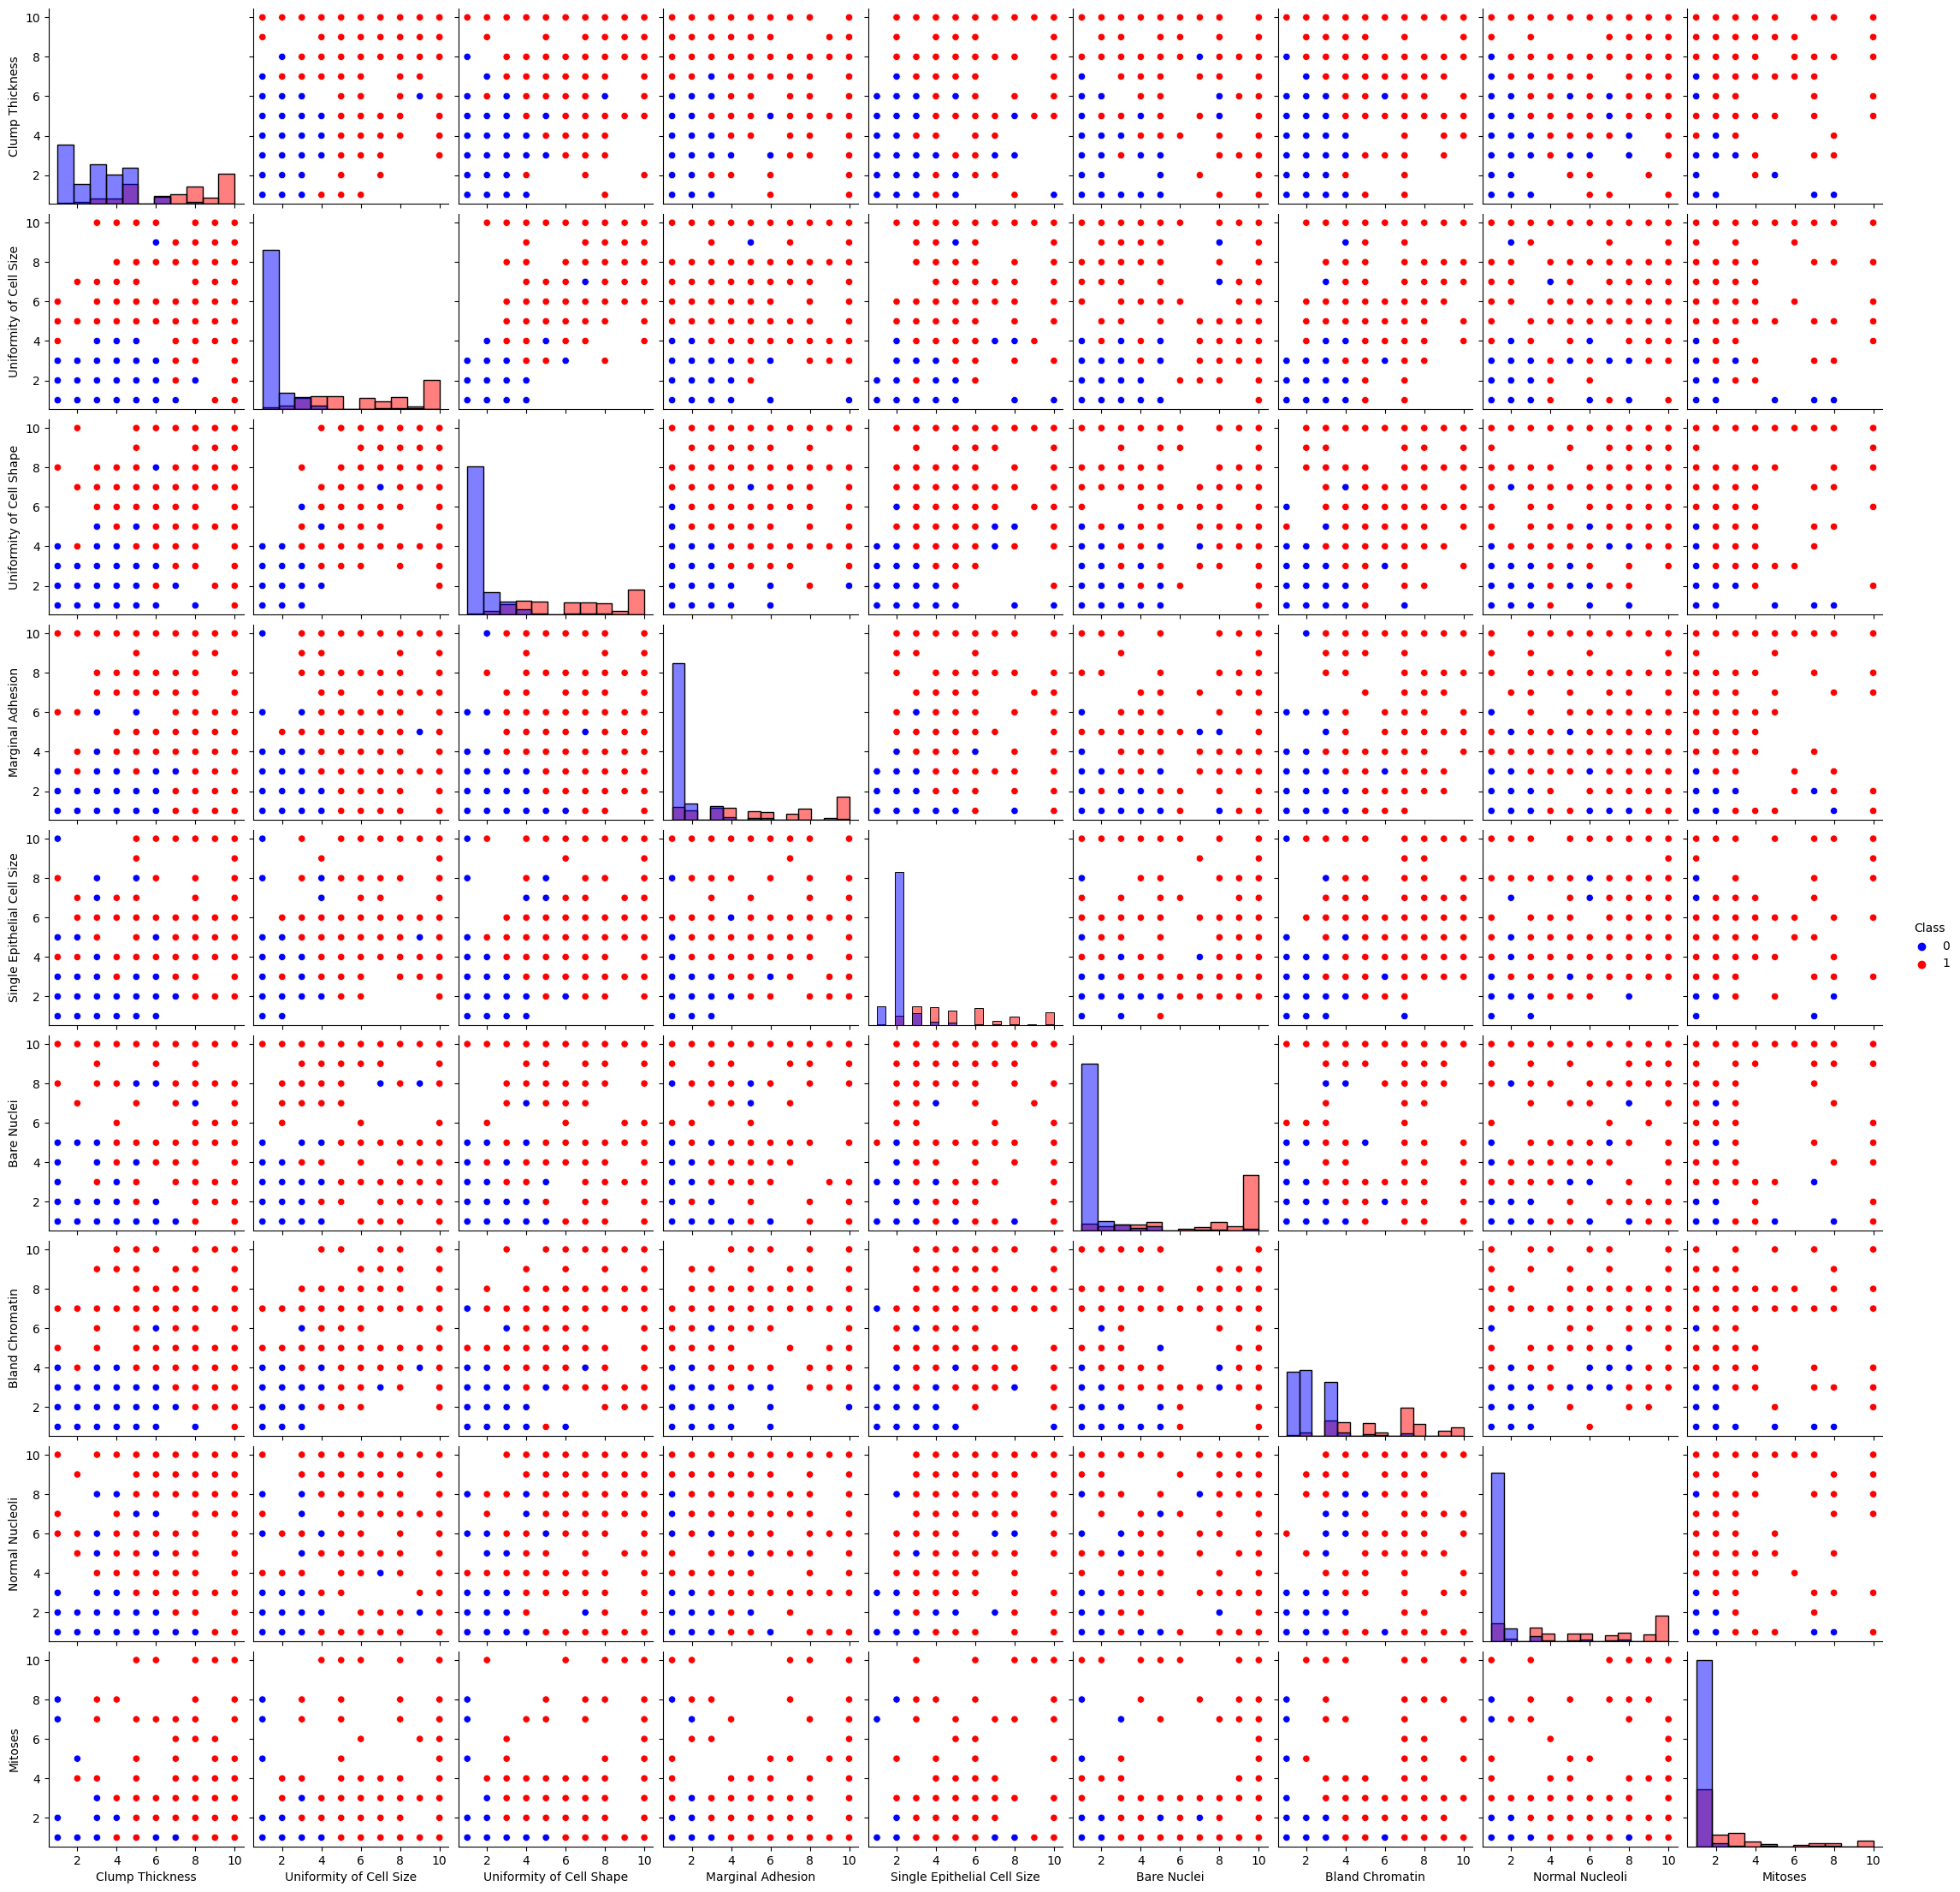

In [16]:
colors = {0: 'blue', 1: 'red'}
sns.pairplot(dataset, hue='Class', palette=colors, diag_kind='hist')

